# Programming Exercise 7: K-means Clustering and Principal Component Analysis

```
by Seokkyu Kong
Date: 2016-04-06
Summary: Coursera machine learning (Prof. Andrew Ng) 강의 내용과 assignment는 octave(matlab)으로 이루어진다. 
해당 코드를 python으로 구현해본다.

Andrew Ng 교수의 강의: https://www.coursera.org/learn/machine-learning/
```

Numpy 와 MATLAB 참고 자료

- [Numpy for Matlab users #1](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)
- [NumPy for MATLAB users #2](http://mathesaurus.sourceforge.net/matlab-numpy.html)


## Introduction

이번 연습문제에서는, K-means 클러스터링 알고리즘을 구현하고 이미지를 압축하는데 응용해본다. 2번째 부분에서는 principal component analysis 주성분 분석을 구현해서 얼굴 이미지에 대한 낮은 차원의 표현을 찾게 된다.

### Files included in this exercise

- ex7.m - Octave/MATLAB script for the first exercise on K-means
- ex7 pca.m - Octave/MATLAB script for the second exercise on PCA
- ex7data1.mat - Example Dataset for PCA
- ex7data2.mat - Example Dataset for K-means
- ex7faces.mat - Faces Dataset
- bird small.png - Example Image
- displayData.m - Displays 2D data stored in a matrix
- drawLine.m - Draws a line over an exsiting figure
- plotDataPoints.m - Initialization for K-means centroids
- plotProgresskMeans.m - Plots each step of K-means as it proceeds
- runkMeans.m - Runs the K-means algorithm
- submit.m - Submission script that sends your solutions to our servers
- [*] pca.m - Perform principal component analysis
- [*] projectData.m - Projects a data set into a lower dimensional space
- [*] recoverData.m - Recovers the original data from the projection
- [*] findClosestCentroids.m- Find closest centroids (used in K-means)
- [*] computeCentroids.m - Compute centroid means (used in K-means)
- [*] kMeansInitCentroids.m - Initialization for K-means centroids

연습문제 첫번째 파트를 통해서, 스크립트 ex7.m을 사용할 것이고 두번째 파트에서는 ex7_pca.m을 사용하게 된다. 이들 스크립트는 문제에 대한 데이터셋을 준비하고 당신이 작성하게 될 함수를 호출한다.

## K-means Clustering

이번 연습문제에서, K-means 알고리즘을 구현하고 이미지 압축을 위해 그것을 사용할 것이다. 먼저 example 2D 데이터셋으로 시작하는데 K-means 알고리즘이 어떻게 동작하는지에 대한 직관을 얻을 수 있다. 그 이후에 K-means 알고리즘을 사용해서 이미지 압축을 하는데 그 이미지 내에 가장 많이 공통적으로 발생하는 컬러의 수를 감소시킴으로 가능하다. 여기서는 ex7.m 을 사용한다.

### 1.1 Implementing K-means

K-means 알고리즘은 자동적으로 유사한 데이터 examples를 함께 묶어 주는 방법이다. 구체적으로, training set {x(1),,, x(m)}이 주어졌을 때 (X^(i) ( R^n), 데이터를 몇개의 결합된 "clusters 군집" 으로 그룹핑하고 싶을 것이다. 

**K-means 에 대한 직관은 반복적인 절차인데, 초기 centroids 줌심점들을 추측하고 이 예측을 가다듬는데, 반복적으로 examples를 그들의 가장 가까운 중심점으로 할당하고 할당된 점들을 기준으로 중심점을 재계산하는 것이다.**

K-means 알고리즘은 다음처럼 동작한다.

```
# 중심점을 초기화한다.

# iterations 만큼 반복하면서
    # 각각의 데이터 포인트를 가장 가까운 중심점에 할당한다.
    # idx(i)는 example i에 할당된 중심점의 인덱스 c^(i)에 일치한다.
    
    # 중심점을 이동시킨다: 중심점에 할당된 평균을 계산한다.


```

XXX: 강의 노트: 
- 임의로 초기화된 K개의 중심점이 주어진다. mu_1, mu_2,,,, mu_k
- 클러스터 할당 단계: 다음 과정을 반복한다.
  * 각각의 데이터 포인트에 대해서 (i = 1 to m)
  * x^(i)에 가장 가까운 중심점의 인덱스 (1 to k)를 c^(i)에 할당한다.
  * 즉, c^(i)의 갯수는 m개 만큼 존재한다.
- 중심점 이동 단계: 
  * 각각의 중심점에 대해서 (k = 1 to K)
  * mu_k = 클러스터 k에 할당된 점들의 평균값
  
- x^(1),,, x^(m): 트레이닝 데이터
- c^(1),,,, c^(m): 각 트레이닝 데이터에 할당된 중심점 정보


**알고리즘의 내부 루프는 반복적으로 다음 2 단계를 수행한다. (i) 각각의 training example x(i)를 가장 가까운 중심점에 할당하면서 (ii) 중심점에 할당된 점들을 사용해서 각 중심점의 평균을 재계산한다.**

K-means 알고리즘은 항상 중심점에 대한 유한한 평균 집합으로 수렴하게 된다.

**수렴된 솔루션이 항상 이상적인 것은 아니고 초기에 설정한 중심점에 의존적임을 주목하라. 그래서 실제로 K-means 알고리즘은 항상 서로 다른 무작위 random 초기화로 여러번 실행한다.**

서로 다른 무작위 초기화에서 서로 다른 솔루션들 중 하나를 선택하는 방법은 가장 낮은 cost function value (distortion) 을 갖는 것을 선택하는 것이다.

당신은 K-means 알고리즘의 2단계를 다음 섹션에서 개별적으로 구현할 것이다.


#### 1.1.1 Finding closest centroids

K-means 알고리즘의 "군집 할당" 단계에서, 알고리즘은 각각의 training example x(i)를 가장 가까운 중심점에 할당한다. 특별히, 각 exaple i 에대해서 우리는 다음과 같이 설정한다.

여기서 c(i)는 x(i)에 가장 가까운 중심점의 index가 되고, mu(j)는 j번째 중심점의 위치(값)이 된다. **c(i)는 시작 코드에서 idx(i)에 일치함을 주목해라.**

당신은 findClosestCentroids.m에 있는 코드를 완성하면 된다. 이 함수는 데이터 행렬 X와 cetroids 에 있는 모든 중심점의 위치를 가지고 1차 배열 idx를 출력하는데 각 training example에 대해서 가장 가까운 중심점의 index를 유지한다. (index는 {1,,,K} 사이의 값인데 K는 전체 중심점의 갯수이다.)

findClosestCetroids.m 에 있는 코드를 완성한 이후에, 스크립트 ex7.m은 코드를 실행시키는데 출력값 [1 3 2]는 처음 3개의 examples에 대한 중심점 할당에 일치한다.


In [122]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

Populating the interactive namespace from numpy and matplotlib


In [123]:
def findClosestCentroids(X, centroids):
    """
    각 예제에 대한 중심점 memberships을 계산한다.
    각각의 행이 단일 example로 구성된 dataset X에 대해서 idx는
    가장 가까운 중심점을 저장하게 된다. idx = m x 1 벡터이며 중심점이
    할당되어 있다. (즉, 각각의 엔트리의 범위는 [1..K] 이다)
    """
    
    # K를 설정한다.
    K = centroids.shape[0]
    
    # 다음 변수를 올바르게 반환해야 한다.
    idx = np.zeros(X.shape[0])
    
    # ====================== YOUR CODE HERE ======================
    # 각 example에 대해서 가장 가까운 중심점을 찾고, 적적할 위치에서
    # idx에 인덱스를 저장한다. 구체적으로 idx(i)는 example i에 가장
    # 가까운 중심점의 인덱스를 포함해야 한다. 따라서 인덱스는 범위 
    # 1..K 사이여야 한다.
    
    # 이 계산을 위해서 examples에 for-loop를 사용할 수 있다.
    
    # *****************************************************************
    # XXX-idea: 각 중심점에서 example별로 거리값을 저장하는 
    # 결과치 행렬을 구성한다. 가급적 벡터화 연산으로 구현한다.
    # *****************************************************************
    m = X.shape[0]
    mat_dist = np.zeros((m, K)) # 각 클러스터 중심점과의 거리 저장
    
    for i in np.arange(K):
        v = centroids[i, :]   # 하나의 클러스터 중심에 대해서
        diff = X - v          # X 벡터와의 거리 차이를 구하고
        dist = sum(diff ** 2, axis=1) # 거리 값을 구한 다음 (row 기준)
        mat_dist[:, i] = dist # mat_dist에 저장한다.
        
    idx = np.argmin(mat_dist, 1) # 행 기준으로 최소값의 인덱스를 찾는다.
    
    return idx
    
"""
In Octave/MATLAB
diff =

  -1.1579205   1.6075716
   2.6585831   1.7999641
   3.3525789   0.2908545
  -0.0959835   1.6122041
"""
print()

In [124]:
# You should now submit your solutions.

# Exercise 7 | Principle Component Analysis and K-Means Clustering
# ================= Part 1: Find Closest Centroids ====================
# K-means 구현을 돕기 위해서 우리는 학습 알고리즘을 2개의 함수로 나누었다.
# -- findClosestCentroids 와 computeCentroids.
# 여기에서는, findClosestCentroids 함수내의 코드를 완성해야 한다.

print('Finding closest centroids.\n\n')

# 우리가 사용할 example dataset을 로드한다.
mat_content = sio.loadmat('ex7data2.mat')
X = mat_content['X']

# 초기 중심점 집합을 선택한다.
K = 3 # 3개의 중심점
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# initial_centroids를 사용해서 examples에 대한 가장 가까운 중심점을 찾는다.
idx = findClosestCentroids(X, initial_centroids)

# Octave/MATLAB 에서는 인덱스가 1부터 시작하고 python은 0부터 시작하므로
# python에서는 0, 2, 1 순서로 출력된다.
print('Closest centroids for the first 3 examples: ')
print(' %s' % idx[0:3])
print('(the closest centroids should be 1, 3, 2 respectively)')


Finding closest centroids.


Closest centroids for the first 3 examples: 
 [0 2 1]
(the closest centroids should be 1, 3, 2 respectively)


#### 1.1.2 Comuting centroid means

중심점에 할당된 모든 점들에 대해서 알고리즘의 2번째 단계는 각각의 중심점에 대해서 중심점에 할당된 점들의 평균을 재계산 한다. 특별히, 각 중심점 k에 대해서 우리는 다음과 같이 설정한다.

**여기서 Ck는 중심점 k에 할당된 examples의 집합이 된다.** 구체적으로 만약 2개의 examples가 말하자면 x(3), x(5)가 중심점 k = 2에 할당되었다면, mu2 = 1/2(x(3) + x(5)) 로 업데이트 해야 한다.

computeCentroids.m 에 있는 코드를 완성해야 한다. **중심점들에 대한 루프를 사용해서 이 함수를 구현할 수 있다. 또한 examples 에 대한 루프도 사용할 수 있는데, 가능하다면 그와 같은 루프 사용 없는 벡터화 구현을 사용해야 한다.** 그러면 코드는 더 빨리 실행될 것이다.

일단 computeCentroids.m 에 있는 코드를 완성하면 스크립트 ex7.m은 코드를 실행시키고 K-means 첫 단계 이후에 중심점을 출력한다.


In [125]:
def computeCentroids(X, idx, K):
    """
    각 중심점에 할당된 data points의 평균값을 계산함으로써 새로운 중심점을 반환한다.
     dataset X가 주어지는데 각 행은 하나의 데이터 포인트가 된다. 벡터 idx는 
     중심점 할당의 인덱스이다. (즉, 각각의 항목은 범위 [1..K] 가 된다)
     K는 중심점의 갯수이다. 
     행렬 centroids를 반환해야 하는데, 각 행은 그 중심점에 할당된 데이터 포인트의 평균값이다.
    """
    
    # 유용한 변수들
    m, n = X.shape
    
    # 아래 변수를 올바르게 반환해야 한다.
    centroids = np.zeros((K, n))
    
    # ====================== YOUR CODE HERE ======================
    # 각각의 중심점에 대해서 그것에 할당된 모든 데이터 포인트의 평균을 
    # 계산한다. 구체적으로 행 벡터인 centroids(i, :)는 중심점 i에 할당된
    # 데이터 포인트의 평균을 포함해야 한다.
    # Note: 이것을 계산하기 위해서 각각의 중심점에 대해서 for-loop를 사용할 수 있다.
    
    for i in np.arange(K):
        sel = (idx == i)
        # column 기준으로 평균을 구한다.
        centroids[i, :] = np.mean(X[sel, :], axis=0)
        
    return centroids

In [126]:
# You should now submit your solutions.

# ===================== Part 2: Compute Means =========================
# 가장 가까운 중심점을 구하는 함수를 구현한 이후에는 
# computeCentroids 함수를 완성해야 한다.

print('Computing centroids means.')

# 이전 파트에서 구한 가장 가까운 중심점을 기반으로 평균을 계산한다.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids: \n')
print(' %s \n' % centroids)
print('the centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')


Computing centroids means.
Centroids computed after initial finding of closest centroids: 

 [[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]] 

the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


### 1.2 K-means on example dataset

그림 1: The expected output

2개의 함수를 완성한 이후에(findClosestCentroids와 computeCentroids), ex7.m의 다음 단계는 toy 2D dataset 상에 K-means 알고리즘을 실행하는데, K-means 가 어떻게 동작하는지 이해하는데 도움이 될 것이다. **당신의 함수는 runKmeans.m 스크립트 내에서 호출된다. 우리는 그 함수가 어떻게 동작하는지 이해하기 위해 그 함수를 볼 것을 권장한다. 코드는 루프 내에서 당신이 구현한 2개의 함수를 호출함을 주목해라.**

다음 단계를 실행할 때, K-means 코드는 가시화 그래프를 생성하는데, 매 반복마다 알고리즘의 진행이 어떻게 이루어지는지 보여준다. enter를 여러번 누르면 K-means 알고리즘의 각 단계가 중심점과 군집 할당을 어떻게 변경시키는지 볼 수 있다. 끝에 가서, 당신의 그림은 그림 1에 보여진 것과 같이 보여야 한다.




In [127]:
def drawLine(p1, p2, varargin=''):
    """
    점 p1에서 점 p2로 직선을 그린다.
    """
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
    
    return

def plotDataPoints(X, idx, K):
    """
    X 에 있는 데이터 포인트를 plot하는데, 색상을 적용한다. idx가 같으면
    동일한 색상을 사용한다.
    """
    
    # 팔레트를 생성한다.
    # palette = hsv(K = 1);
    # colors = palette(idx, :);
    
    # 데이터를 plot한다.
    #plt.scatter(X[:, 0], X[:, 1], s = 55, color=idx)
    
    # ************************************************
    # XXX: plt.xxx 에서 color map 사용하기
    # 1) map()은 [0..1] 사이의 범위 값을 입력으로 받는다.
    # 2) 출력값은 컬러를 나타내는 RGB 값이 된다.
    # refer: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
    # ************************************************
    map = plt.get_cmap("jet")
    idxn = idx / K # idxn = [0..1]
    colors = map(idxn) # colors[0] = [ 0. 0. 0.5 1.]
    
    plt.scatter(X[:, 0], X[:, 1], s = 55, edgecolors=colors, \
                marker='o', facecolors='none', lw=0.5)
    
    # 따로따로 그래프를 그린다.
    #plt.show()
    
    return
    
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    """
    plotProgresskMeans는 k-Means가 실행되면서 진행되는 정도를 표시하는
    도와주는 함수이다. 2D 데이터에 대해서만 사용하게끔 의도되었다.
    이 함수는 데이터 포인트를 plot 하는데, 각 중심점에 할당된 컬러로
    표시한다. 이전 중심점과 함께, 중심점의 이전 위치와 현재 위치 사이에 
    직선도 그린다.
    """
    
    # examples를 plot한다.
    plotDataPoints(X, idx, K)
    
    # 중심점을 검은색 x로 그린다.
    plt.plot(centroids[:,0], centroids[:, 1], 'x', c='black', lw = 3)
    
    # 직선으로 중심점의 history를 plot한다.
    for j in np.arange(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :])
        
    # 타이틀
    plt.title('Iteration number %d' % i)
    


def runkMeans(X, initial_centroids, max_iters, plot_progress = False):
    """
    K-Means 알고리즘을 데이터 행렬 X 상에 실행시킨다. X의 각 행은 단일 example이다.
    initial_centroids를 최기 중심점으로 사용한다. max_iters는 K-Means를 실행시킬
    전체 반복 횟수를 지정한다. plot_progress는 true/flase 플래그인데 만약 함수가 학습이
    발생함에 따라 진행 정도를 또한 plot해야 하는지를 나타낸다. 이것은 기본적으로 false로
    설정된다. runkMeans는 centroids를 반환하는데, Kxn 행렬이고 계산된 centroids와 idx,
    m x 1벡터의 중심점 할당 인덱스(즉, 각 항목은 범위 [1..K] 사이이다)가 된다.
    """
    
    # plot 진행을 위한 기본값을 설정한다.

    # 만약 진행정도를 plot 해야 한다면, 그래프를 그릴 준비한다.
    
    # 값을 초기화한다.
    m, n = X.shape    
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    # K-Means를 실행한다.
    for i in np.arange(max_iters):
        
        # 진행 정도를 출력한다.
        print('K-Means iteration %d/%d...' % (i, max_iters))
        
        # X에 있는 각 example에 대해서, 가장 가까운 중심점을 할당한다.
        idx = findClosestCentroids(X, centroids)
        
        # 부가적으로, 진행 정도를 여기서 plot 한다.
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            print('Press enter to continue.')
            
        # 주어진 memberships에 대해서 새로운 중심점을 계산한다.
        centroids = computeCentroids(X, idx, K)
        
    return centroids, idx
        

Running K-Means clustering on example dataset.
K-Means iteration 0/10...
Press enter to continue.
K-Means iteration 1/10...
Press enter to continue.
K-Means iteration 2/10...
Press enter to continue.
K-Means iteration 3/10...
Press enter to continue.
K-Means iteration 4/10...
Press enter to continue.
K-Means iteration 5/10...
Press enter to continue.
K-Means iteration 6/10...
Press enter to continue.
K-Means iteration 7/10...
Press enter to continue.
K-Means iteration 8/10...
Press enter to continue.
K-Means iteration 9/10...
Press enter to continue.
K-Means Done.


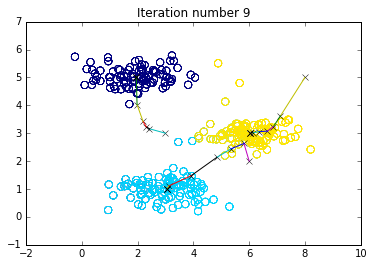

In [128]:
# =================== Part 3: K-Means Clustering ======================
# 2개의 함수 computeCentroids와 findClosestCentroids를 완성한 이후에
# 당신은 kMeans 알고리즘을 수행하기 위한 모든 필요한 부분을 갖게 된다.
# 여기에서는 우리가 제공한 example dataset 상에서 K-Means 알고리즘을
# 실행할 것이다.
print('Running K-Means clustering on example dataset.')

# example dataset을 로드한다.
mat_content = sio.loadmat('ex7data2.mat')

# K-Means를 실행하기 위한 설정 정보
K = 3
max_iters = 10

# 일관성을 위해서, 여기서 우리는 중심점을 특정한 값으로 설정한다.
# 하지만, 실무에서는 중심점들을 자동으로 생성하고 싶어 할 것이다.
# 무작위로 몇몇 examples를 선정하는 방법이 있다. (kMenasInitCentroids 에서 보여진다.)
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# K-Means 알고리즘을 실행한다. 끝에 있는 'true'는 우리의 함수가 K-Means의 진행정도를 
# plot 하게끔 알려준다.
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

print('K-Means Done.')

### 1.3 Random initialization

ex7.m에 있는 example dataset에 대한 중심점의 초기 할당은 그림 1과 같이 동일한 그림을 볼 수 있도록 설계 되었다. 실무에서, 중심점을 초기화 하는 좋은 전략은 training set에서 랜덤하게 example을 선택하는 것이다.

연습문제에서, 다음 코드를 가진 kMeansInitCentroids.m 의 함수를 완성해야 한다.

```
% Initialize the centroids to be random examples

% Randomly reorder the indices of examples
randidx = randperm(size(X, 1));
% Take the first K examples as centroids
centroids = X(randidx(1:K), :);
```

위의 코드는 먼저 examples의 인덱스를 무작위로 조합한다. (randperm을 사용해서). 그리고 난 다음, 인덱스의 무작위 조합에 근거해서 처음 K 개의 examples를 선택한다. 이것은 동일한 인덱스를 두번 선택하는 risk 없이 examples가 무작위로 선택될 수 있게 해준다.





In [129]:
# You do not need to make any submissions for this part of the exercie.


### 1.4 Image compression with K-means

Figure 2: The original 128x128 image.

연습문제에서, K-means를 이미지 압축에 적용할 것이다. 이미지에 대한 일련의 24bit 컬러 표현에 있어서, 각각의 픽셀은 3개의 8bit unsigned integers로 표현된다 (9에서 255인 정수) 그래서 red, green 그리고 blue에 대한 강도값을 나타낸다. 이와 같은 인코딩은 종종 RGB 인코딩이라고 부른다. **우리 이미지는 수천개의 컬러를 포함하고 있고 연습문제에서는 컬러 수를 16 컬러로 줄이게 될 것이다.**

reduction 감소를 수행함으로써, (압축된) 사진을 효과적으로 표현하는 것이 가능하다. **특히 당신은 16개의 선택된 컬러의 RGB값만 저장할 필요가 있다. 그리고 이미지 내의 각각의 픽셀에 대해서 그 위치에서의 컬러의 인덱스(16가지 경우를 표현하기 위해서는 단지 4bits만 필요한데) 만 저장할 필요가 있다.**

연습문제에서, K-means 알고리즘을 사용해서 압축된 이미지를 표현하는데 사용할 16개의 컬러를 선택한다. 구체적으로 원래 이미지 내의 각 픽셀을 data example로 처리하고 K-means 알고리즘을 사용해서 16개의 컬러를 찾는데 3차원 RGB 공간에서 가장 잘 그룹(클러스터) 되는 컬러가 된다.

#### 1.4.1 K-means on pixels

Octave/MATLAB에서 이미지는 다음처럼 읽을 수 있다.

```
A = imread('bird.small.png');
```

**이것은 3차원의 행렬A를 만드는데 처음 2개의 인덱스는 픽셀 위치를 나타내고 마지막 인덱스는 각각 빨강, 초록 또는 파랑을 나타낸다. 예를 들어 A(50, 33, 3)은 50번째 행과 33번째 컬럼에서 파란색 강도의 값을 준다.**

ex7.m 내의 코드는 처음에 이미지를 로드하고, mx3의 픽셀 컬러를 생성하기 위해서 reshape 하고 K-means를 호출한다.

이미지를 나타내는 맨 위의 K = 16인 컬러들을 찾고 난 후에 이제 각 픽셀 위치에 가장 가까운 중심점을 할당하는데 findClosestCentroids 함수를 사용한다.

이것은 각 픽셀에 할당된 중심점을 이용해서 원래 이미지를 나타내게 한다. 이미지를 표현하기 위해 요구되는 픽셀수가 아주 많이 감소되었음을 주목할 수 있다. **원래 이미지는 128 x 128 픽셀 위치 각각에 대해서 24 bits가 필요했다.** 새로운 표현은 어느 정도 오버헤드 저장소가 필요한데 16 컬러의 딕셔너리 형태이고 각각은 24 bits를 필요로 한다. 그러나 이미지 자체는 각 픽셀 위치마다 4 bits만 필요하다. **결과적으로 전체 사이즈는 128 x 128 x 24 = 393,216 bits가 된다. 사용된 최종 bits는 16 x 24 + 128 x 128 x4 = 65,920 bits 수가 된다.** 그것은 원래 이미지를 6배 정도 압축한 것과 일치한다.


마지막으로, 중심점 할당만으로 이루어진 이미지를 재구축함으로써 압축 효과를 볼 수 있다. 특히, 각 픽셀 위치를 해당 위치에 할당된 중심점의 평균으로 치환할 수 있다. 그림 3은 우리가 얻은 재구축된 이미지를 보여준다. 비록 결과 이미지가 원래 이미지의 대부분의 특성을 유지하지만 어느 정도 압축된 인위적 결함 또한 볼 수 있다.




K-Means iteration 0/10...
K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
Applying K-Means to compress an image.


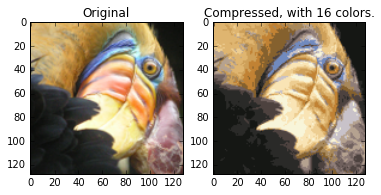

In [135]:

def kMeansInitCentroids(X, K):
    """
    이 함수는 K개의 중심점을 초기화 해서 데이터셋 X상에서 K-Means에 사용될 수 있게 한다.
    """
    
    # 다음 변수를 올바르게 반환해야 한다.
    centroids = np.zeros((K, X.shape[1]))
    
    # ====================== YOUR CODE HERE ======================
    # dataset X에서 무작위로 examples를 선택하고 중심점으로 설정한다.
    
    # 중심점이 무작위 example이 되도록 초기화한다.
    # examples의 인덱스를 무작위로 재정렬한다.
    randidx = np.arange(X.shape[0])
    np.random.shuffle(randidx)

    centroids = X[randidx[0:K], :]
    
    return centroids

# You do not need to make any submissions for this part of the exercise.

import scipy.misc

# ============= Part 4: K-Means Clustering on Pixels ===============
# 이번 연습문제에서는, 이미지를 압축하기 위해 K-Means를 사용한다. 이것을 하기 위해서
# 먼저 이미지 내의 픽셀 컬러에 대해서 K-Means를 실행한다. 그리고 각 픽셀을 
# 가장 가까운 중심점으로 매핑한다.

# Running K-Means clustering on pixels from an image.

# refer: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.misc.imread.html
# 새의 이미지를 로드한다.
A = double(scipy.misc.imread('bird_small.png'))

# 만약 imread가 동작하지 않는다면, 대신 아래 것으로 시도해볼 수 있다.
# load('bird_small.mat')

A = A / 255 # 255로 나누어서 모든 값이 범위 0 - 1사이가 되도록 한다.

# 이미지의 사이즈
img_size = A.shape

# 이미지를 Nx3 행렬로 reshape하는데 N = 픽셀의 갯수이다.
# 각 행은 Red, Green 그리고 Blue 픽섹의 값을 포함한다.
# 이것은 K-Means가 사용할 데이터셋 행렬 X를 제공해준다.
X = A.reshape(img_size[0] * img_size[1], 3) # X: 16384 x 3

# 이 데이터로 K-Means 알고리즘을 실행해라.
# 서로 다른 K와 max_iters로 시도해본다.
K = 16
max_iters = 10

# K-Means를 사용할 때, 중심점을 무작위로 초기화 하는 것은 중요하다.
# 다음을 진행하기 전에 kMeansInitCentroids.m 내의 코드를 완성해야 한다.
initial_centroids = kMeansInitCentroids(X, K)

# K-Means 실행하기
centroids, idx = runkMeans(X, initial_centroids, max_iters)

# ================= Part 5: Image Compression ======================
# 여기에서는, 이미지를 압축하기 위해 K-Means의 클러스터를 사용한다.
# 이것을 하기 위해, 우리는 먼저 각 example에 대해 가장 가까운 클러스터를
# 찾아야 한다. 그리고 난후 우리는...

print('Applying K-Means to compress an image.')

# 가장 가까운 클러스터 멤버를 찾는다.
idx = findClosestCentroids(X, centroids)

# 기본적으로, 우리는 이제 이미지 X를 idx 내의 인덱스 관점에서 표현할 수 있다.

# 우리는 이제 인덱스로부터 이미지를 재구축할 수 있는데, 
# 각 픽셀(idx 내의 인덱스로부터 가리켜지는)을 중심점 값으로 매핑하면 된다.
X_recovered = centroids[idx, :]

# 복구된 이미지를 적절한 차원으로 reshape한다.
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)

# ********************************************************
# XXX: plt.subplot(row 수, column 수, subplot 위치 지정)
# refer: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
# ********************************************************
# 원래 이미지를 보여준다.
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')

# 압축된 이미지를 옆에서 보여준다.
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title('Compressed, with %d colors.' % K)

plt.show()


### 1.5 Optional (ungraded) exercise: Use your own image

이번 연습문제에서, 우리가 제공한 코드를 수정하고 당신의 이미지에 대해서 실행시켜 보아라. 당신의 이미지가 매우 크다면, K-means 수행 시간이 길어짐을 주목하라. 그래서 우리는 코드를 실행하기 전에 관리가 가능한 크기로 이미지 크기를 조정할 것을 권장한다. 당신은 K를 다양하게 시도함으로써 압축 효과를 또한 볼 수 있다.



K-Means iteration 0/10...
K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
Applying K-Means to compress a test image.


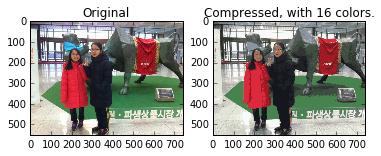

In [136]:
# 아래는 테스트 이미지를 사용해서 압축을 해본다.

A = double(scipy.misc.imread('test.jpg'))
A = A / 255 # 255로 나누어서 모든 값이 범위 0 - 1사이가 되도록 한다.

# 이미지의 사이즈
img_size = A.shape

X = A.reshape(img_size[0] * img_size[1], 3) # X: 16384 x 3
K = 16
max_iters = 10

initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

print('Applying K-Means to compress a test image.')

idx = findClosestCentroids(X, centroids)

X_recovered = centroids[idx, :]
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)

# 원래 이미지를 보여준다.
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')

# 압축된 이미지를 옆에서 보여준다.
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title('Compressed, with %d colors.' % K)

plt.show()

# *********************************************************************************
# XXX: scipy.misc.imsave, matplotlib.image.imsave: image를 디스크에 파일로 저장한다.
# 호출하는 api에 따라 저장되는 이미지의 파일 사이즈가 달라진다. 특정 옵션이 주어져야 하나보다.
# 1) scipy.misc.imsave: 76KB
# 2) matplotlib.image.imsave: 179KB
# *********************************************************************************
import scipy
scipy.misc.imsave('test2.jpg', X_recovered)

matplotlib.image.imsave('test3.jpg', X_recovered)

## 2. Principal Component Analysis

이번 연습문제에서, 당신은 dimensionaliry reduction 차원 축소를 수행하기 위해서 principal component analysis(PCA) 주성분분석을 사용한다. 첫번째로 example 2D dataset으로 실험하는데 PCA가 어떻게 동작하는지 직관을 얻을 수 있다. 그리고 난 다음 보다 큰 얼굴 이미지 dataset 5000개에 대해 그것을 사용할 것이다.

제공된 스크립트 ex7_pca.m은 연습문제 첫번째 진행을 도와줄 것이다.

### 2.1 Example Dataset


